In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving walmart-sales-dataset-of-45stores.csv to walmart-sales-dataset-of-45stores.csv
User uploaded file "walmart-sales-dataset-of-45stores.csv" with length 363732 bytes


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['walmart-sales-dataset-of-45stores.csv'].decode('utf-8')))

# Display the first few rows of the DataFrame
print(df.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.isna().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


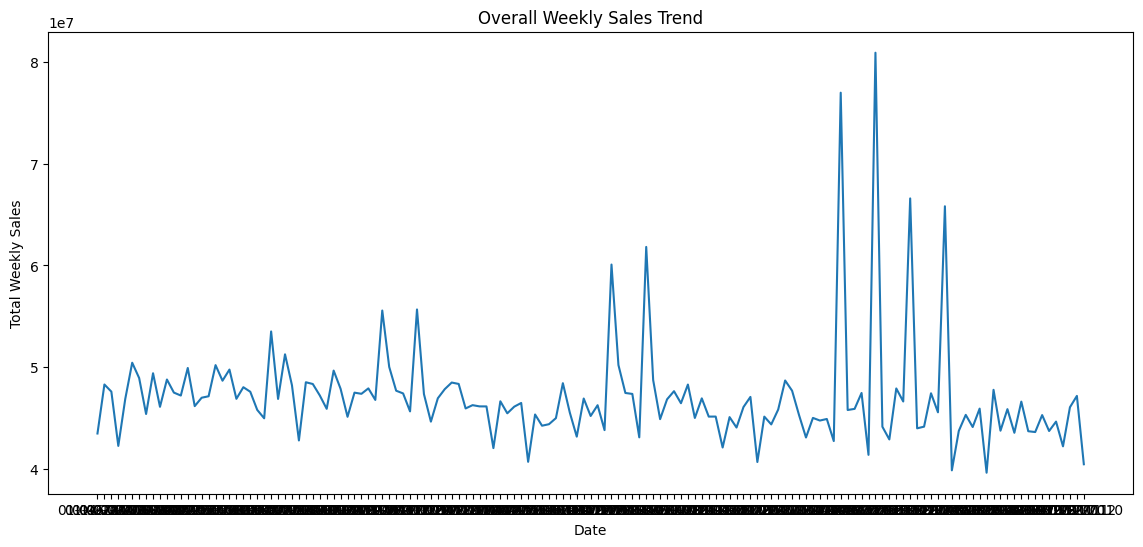

In [ ]:
weekly_total = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(weekly_total['Date'], weekly_total['Weekly_Sales'])
plt.title("Overall Weekly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()

In [ ]:
store_stats = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'std']).reset_index()
store_stats['cv'] = store_stats['std'] / store_stats['mean']  # coefficient of variation

top_volatile = store_stats.sort_values('cv', ascending=False).head(10)
top_volatile_stores

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
858,7,05-02-2010,496725.44,0,10.53,2.580,189.381697,9.014
859,7,12-02-2010,524104.92,1,25.90,2.572,189.464272,9.014
860,7,19-02-2010,506760.54,0,27.28,2.550,189.534100,9.014
861,7,26-02-2010,496083.24,0,24.91,2.586,189.601802,9.014
862,7,05-03-2010,491419.55,0,35.86,2.620,189.669505,9.014
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


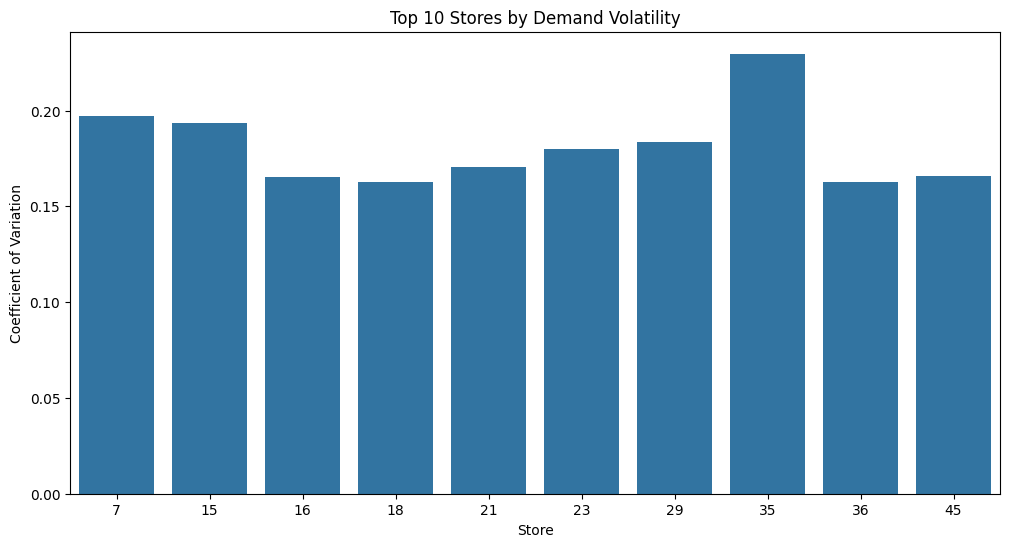

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_volatile, x='Store', y='cv')
plt.title("Top 10 Stores by Demand Volatility")
plt.ylabel("Coefficient of Variation")
plt.show()

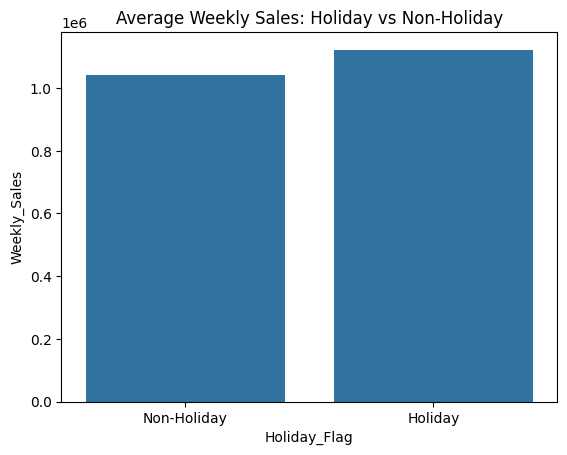

In [ ]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()

sns.barplot(data=holiday_sales, x='Holiday_Flag', y='Weekly_Sales')
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.show()


In [ ]:
volatile_store = top_volatile.iloc[0]['Store']
stable_store = store_stats.sort_values('cv').iloc[0]['Store']


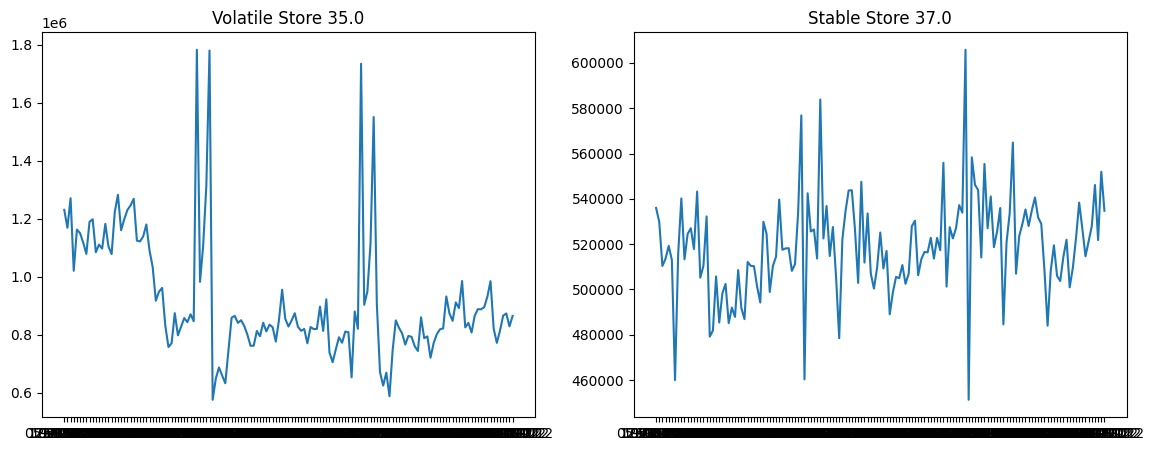

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
store_data = df[df['Store'] == volatile_store]
plt.plot(store_data['Date'], store_data['Weekly_Sales'])
plt.title(f"Volatile Store {volatile_store}")

plt.subplot(1,2,2)
store_data = df[df['Store'] == stable_store]
plt.plot(store_data['Date'], store_data['Weekly_Sales'])
plt.title(f"Stable Store {stable_store}")

plt.show()


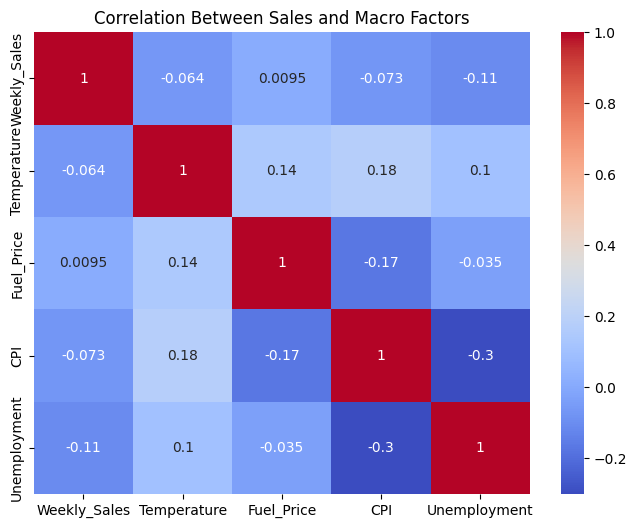

In [ ]:
macro_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corr = df[macro_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Sales and Macro Factors")
plt.show()
